In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("yeni-features.csv")

In [3]:
data.head()

ZCR   chroma1   chroma2   chroma3   chroma4   chroma5   chroma6  \
0  0.245415  0.727877  0.750178  0.705440  0.693908  0.682825  0.644265   
1  0.262432  0.738267  0.789713  0.767244  0.772991  0.773717  0.673986   
2  0.125376  0.676265  0.710265  0.778565  0.708127  0.650461  0.663062   
3  0.125376  0.676265  0.710265  0.778565  0.708127  0.650461  0.663062   
4  0.213895  0.647739  0.705387  0.702696  0.644314  0.629442  0.650590   

    chroma7   chroma8   chroma9  ...  mfcc3_10  mfcc3_11  mfcc3_12  mfcc3_13  \
0  0.655927  0.701594  0.732304  ... -0.136967  0.083170  0.200814 -0.068312   
1  0.635197  0.680990  0.723854  ... -0.008739  0.126101  0.193888 -0.102906   
2  0.630932  0.613767  0.670002  ... -0.148660  0.079366  0.114936 -0.094556   
3  0.630932  0.613767  0.670002  ... -0.148660  0.079366  0.114936 -0.094556   
4  0.597663  0.639436  0.669554  ... -0.113813  0.108463  0.103265 -0.050738   

        RMS   RMS_VAR    Bandwidth  Bandwidth_var  spectral_centroid   labels  
0  0.003680  0.000013  2308.586265  595679.392559        2363.771193  neutral  
1  0.003922  0.000011  3026.534186  101620.313979        3799.669877  neutral  
2  0.002559  0.000005  2285.224582  582855.020805        2341.927543  neutral  
3  0.002559  0.000005  2285.224582  582855.020805        2341.927543  neutral  
4  0.003986  0.000014  2314.832489  508373.608044        2341.732753  neutral  

[5 rows x 58 columns]

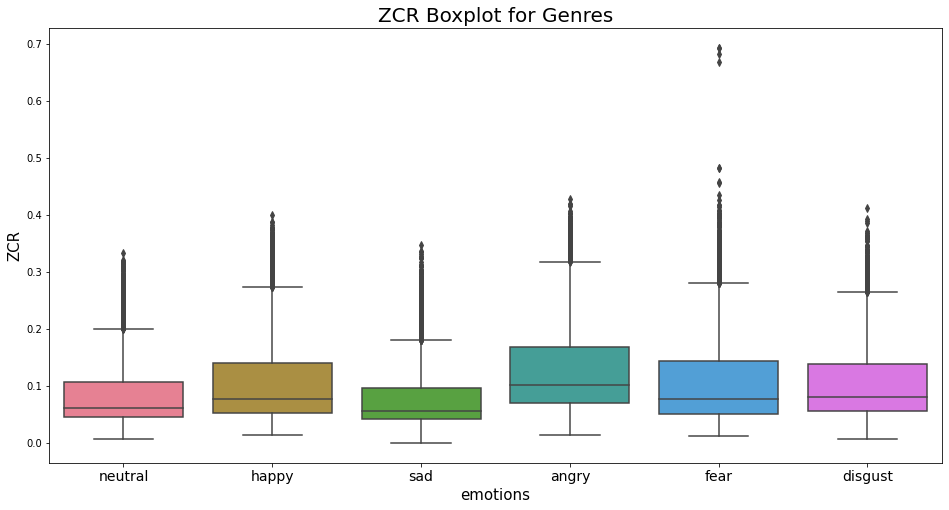

In [5]:
x = data[["labels", "ZCR"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "labels", y = "ZCR", data = x, palette = 'husl');

plt.title('ZCR Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("emotions", fontsize = 15)
plt.ylabel("ZCR", fontsize = 15)
plt.savefig("ZCR_Boxplot.png")

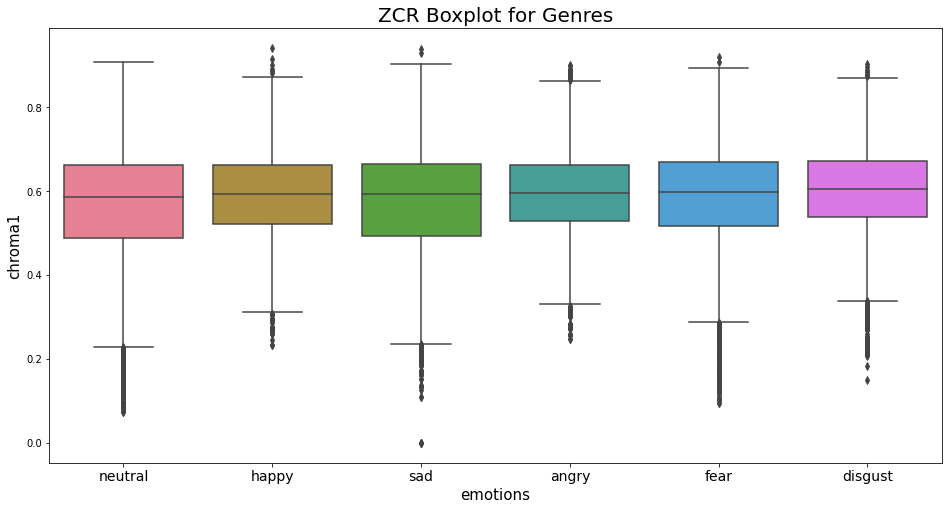

In [7]:
x = data[["labels", "chroma1"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "labels", y = "chroma1", data = x, palette = 'husl');

plt.title('Chroma Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("emotions", fontsize = 15)
plt.ylabel("chroma1", fontsize = 15)
plt.savefig("chroma1_Boxplot.png")

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Random Forest 

In [9]:
X = data.drop("labels",axis=1)
Y = data["labels"]

In [10]:
encoder = LabelEncoder()

In [11]:
Y = encoder.fit_transform(Y)

In [12]:
Y

array([4, 4, 4, ..., 5, 5, 5])

In [13]:
scaler = StandardScaler()

In [15]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [17]:
scaler.fit(x_train)

StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
rf1 = RandomForestClassifier(n_estimators=150)

In [20]:
rf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [21]:
rf1.score(x_test,y_test)

0.7673108779679735

In [22]:
rf1_pred = rf1.predict(x_test)

In [24]:
cm = confusion_matrix(y_test,rf1_pred)

In [26]:
sns.heatmap(cm,annot=True,fmt="d")

<AxesSubplot:>

In [27]:
rf2 = RandomForestClassifier(n_estimators=250)

In [28]:
rf2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250)

In [29]:
rf2.score(x_test,y_test)

0.7726118166758696

In [35]:
pred2=rf2.predict(x_test)

In [36]:
print(accuracy_score(y_test,pred2))

0.7726118166758696


### XGBoost

In [30]:
import xgboost as xgb

In [33]:
xgb.XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [53]:
xgbcl=xgb.XGBClassifier(n_estimators=250,
                       objective='multi:softmax',n_jobs=6)

In [54]:
xgbcl.fit(x_train,y_train)

c:\users\emreh\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=6,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [55]:
xgbcl.score(x_test,y_test)

0.7782440640530094

## Feature Extraction

In [58]:
from sklearn.feature_selection import RFE

In [59]:
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=30, step=1)
rfe = rfe.fit(x_train, y_train)

In [65]:
print('Chosen best 30 feature by rfe:',data.columns[:-1][rfe.support_])

Chosen best 30 feature by rfe: Index(['ZCR', 'chroma3', 'chroma4', 'chroma5', 'chroma7', 'chroma8',
       'chroma10', 'chroma11', 'chroma12', 'mfcc1_1', 'mfcc1_2', 'mfcc1_3',
       'mfcc1_4', 'mfcc1_5', 'mfcc1_6', 'mfcc1_8', 'mfcc1_9', 'mfcc1_10',
       'mfcc1_12', 'mfcc2_1', 'mfcc2_2', 'mfcc2_3', 'mfcc2_4', 'mfcc2_8',
       'mfcc2_9', 'mfcc3_1', 'RMS', 'RMS_VAR', 'Bandwidth', 'Bandwidth_var'],
      dtype='object')


### 30 Feature ile random forest 

In [69]:
X_yeni=data[['ZCR', 'chroma3', 'chroma4', 'chroma5', 'chroma7', 'chroma8',
       'chroma10', 'chroma11', 'chroma12', 'mfcc1_1', 'mfcc1_2', 'mfcc1_3',
       'mfcc1_4', 'mfcc1_5', 'mfcc1_6', 'mfcc1_8', 'mfcc1_9', 'mfcc1_10',
       'mfcc1_12', 'mfcc2_1', 'mfcc2_2', 'mfcc2_3', 'mfcc2_4', 'mfcc2_8',
       'mfcc2_9', 'mfcc3_1', 'RMS', 'RMS_VAR', 'Bandwidth', 'Bandwidth_var']]

In [70]:
x_train2,x_test2,y_train2,y_test2 =train_test_split(X_yeni,Y,test_size=0.2,random_state=42,shuffle=True)

In [71]:
rf2.fit(x_train2,y_train2)

RandomForestClassifier(n_estimators=250)

In [72]:
rf2.score(x_test2,y_test2)

0.7641082274986195

## Tree bazlı feature seçimi 

In [75]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Feature ranking:
1. feature 53 (0.043911)
2. feature 52 (0.036499)
3. feature 13 (0.026984)
4. feature 15 (0.026534)
5. feature 26 (0.023065)
6. feature 0 (0.021764)
7. feature 21 (0.020314)
8. feature 34 (0.019920)
9. feature 18 (0.019667)
10. feature 8 (0.019411)
11. feature 14 (0.019345)
12. feature 17 (0.019299)
13. feature 28 (0.019174)
14. feature 16 (0.019094)
15. feature 20 (0.019041)
16. feature 24 (0.019000)
17. feature 11 (0.018954)
18. feature 7 (0.018199)
19. feature 29 (0.018002)
20. feature 10 (0.017611)
21. feature 12 (0.017610)
22. feature 55 (0.016963)
23. feature 54 (0.016667)
24. feature 3 (0.016537)
25. feature 4 (0.016319)
26. feature 22 (0.016263)
27. feature 39 (0.016203)
28. feature 27 (0.015987)
29. feature 33 (0.015890)
30. feature 25 (0.015788)
31. feature 5 (0.015783)
32. feature 19 (0.015735)
33. feature 32 (0.015624)
34. feature 56 (0.015606)
35. feature 30 (0.015410)
36. feature 42 (0.015350)
37. feature 23 (0.015308)
38. feature 9 (0.015222)
39. feature

AttributeError: 'numpy.ndarray' object has no attribute 'columns'